## About

This plot is an **animation** that displays the evolution of objects launched in outer space by the USA and Russia between 1958 and 2023. It has been made for the #TidyTuesday challenge.

The chart was made by [Joseph B](https://www.barbierjoseph.com/) with [matplotlib](/matplotlib). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![gif](../../static/animations/web-animation-with-text8.gif)


## Libraries

First, you need to load a whole bunch of libraries:


In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
import textwrap
import math
from matplotlib.animation import FuncAnimation

## Dataset

For this reproduction, we're going to retrieve the data directly from the gallery's Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

Then, we apply a few simple modifications to the data in order to have **1 row per year**, with 2 columns: the number of outer space object for the US and for the Russia.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/space_objects.csv"
url = '../../static/data/space_objects.csv'

df = pd.read_csv(url)

df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)

# pivot data
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)
pivot_df_reference = pivot_df.copy() # save for later annotation

pivot_df.head()

Code,RUS,USA
Year,,
1958,1.0,7.0
1959,3.0,11.0
1960,3.0,17.0
1961,7.0,31.0
1962,20.0,55.0


Now we have a dataset that fits perfectly the needs for this animation!


## Minimalist animation

Let's start with the most simple animation possible.

The `update()` function is designed to **update the contents of the plot** for each animation frame. It uses the `frame` argument which is simply the index (a number) of the row in the dataset.

`subset_df = pivot_df.iloc[:frame]` **slices** the DataFrame pivot_df to get data **up to the current** frame number

Then, the `FuncAnimation()` function is used to **create the animation** by repeatedly calling the `update()` function.

Finally, we save it using the `save()` function.


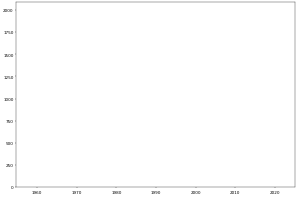

In [3]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

fig, ax = plt.subplots(figsize=(12, 8))

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index,
        subset_df.values.T
    )
    return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
ani.save('../../static/animations/web-animation-with-text.gif', writer='imagemagick', fps=5)

![gif](../../static/animations/web-animation-with-text.gif)


## Colors and static annotations

Now, let's add some colors and static annotations to the plot.

We create a `colors` list, which will then be used for the annotations and the chart. You can **change the values** inside it and it will **automatically** update the colors of the annotations.

Annotations are added using the `highlight_text` package and its `ax_text()` and `fig_text()` functions. You can learn more about it [in this post](/advanced-custom-annotations-matplotlib).


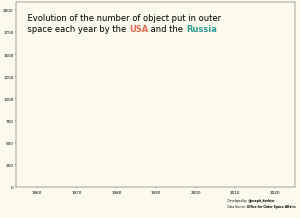

In [4]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index,
        subset_df.values.T,
        colors=colors
    )

    # description of video
    text = """
    Evolution of the number of object put in outer
    space each year by the <USA> and the <Russia>
    """
    fig_text(
        0.127, 0.84,
        text,
        ha='left', va='top',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'}
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    Data Source: <Office for Outer Space Affairs>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7,
        color='black',
        highlight_textprops=[
            {'fontweight':'bold'},
            {'fontweight':'bold'},
        ],
        fig=fig
    )

    return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
ani.save('../../static/animations/web-animation-with-text2.gif', writer='imagemagick', fps=5)

![gif](../../static/animations/web-animation-with-text2.gif)


## Axis and scale

In the previous output, we can see some **overlapping** between the annotations and the chart.

In order to fix this, we will change the **y-axis** scale by multiplying its maximum value by `1.9`. This will create a **large empty space** that will give more room for the annotations coming.

We also **remove** the `top` and `right` spines, as well as x-axis ticks and labels.


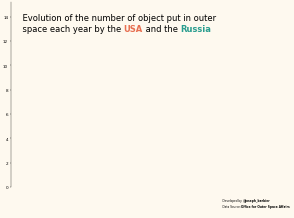

In [5]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index,
        subset_df.values.T,
        colors=colors
    )

    # custom axis
    factor_y_axis = 1.9
    y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
    ax.set_ylim(0, y_max)
    ax.set_xticks([])
    ax.spines[['top', 'right', 'bottom']].set_visible(False)

    # description of video
    text = """
    Evolution of the number of object put in outer
    space each year by the <USA> and the <Russia>
    """
    fig_text(
        0.127, 0.84,
        text,
        ha='left', va='top',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'}
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    Data Source: <Office for Outer Space Affairs>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7,
        color='black',
        highlight_textprops=[
            {'fontweight':'bold'},
            {'fontweight':'bold'},
        ],
        fig=fig
    )

    return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
ani.save('../../static/animations/web-animation-with-text3.gif', writer='imagemagick', fps=5)

![gif](../../static/animations/web-animation-with-text3.gif)


## Text that appears throughout the animation

In order to have a text that is displayed **throughout the animation**, we need to find a way to define **what part** of the text we should display at each frame. Here is how it works:

1. **Total Characters Calculation**: It first calculates the total number of characters in the full description using `len(description)`, where `description` is the text we want to display.

2. **Effective Frame Count**: It determines the number of frames over which the text will appear, excluding the last 20 frames of the total number of frames in `pivot_df`. Exclude the last 20 frames to ensure the text is displayed for a reasonable amount of time and **ends before** the animation ends.

3. **Characters per Frame**: It calculates how many characters of the description should be displayed up to the current frame. If the current frame is before the end of the effective frame count, it shows a portion of the text proportional to the current frame number. If the current frame number is at or beyond the effective frame count, it shows the entire text.

4. **Current Text**: The script then extracts the portion of the description up to the calculated number of characters.

5. **Text Wrapping**: Finally, it wraps the text to ensure each line does not exceed 70 characters, which helps in making the text easy to read on screen. Each paragraph is processed separately to maintain paragraph breaks.

In order to make the code cleaner, we define **on top of the script** values that will be then used in annotations and in the text that appears throughout the animation.


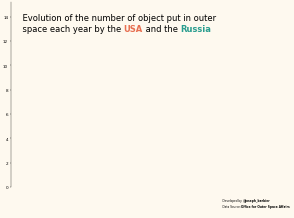

In [6]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# important dates
start_date = 1958
end_date = 2023

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index,
        subset_df.values.T,
        colors=colors
    )

    # custom axis
    factor_y_axis = 1.9
    y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
    ax.set_ylim(0, y_max)
    ax.set_xticks([])
    ax.spines[['top', 'right', 'bottom']].set_visible(False)

    # description of video
    text = """
    Evolution of the number of object put in outer
    space each year by the <USA> and the <Russia>
    """
    fig_text(
        0.127, 0.84,
        text,
        ha='left', va='top',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'}
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    Data Source: <Office for Outer Space Affairs>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7,
        color='black',
        highlight_textprops=[
            {'fontweight':'bold'},
            {'fontweight':'bold'},
        ],
        fig=fig
    )

    # get text to display at current frame
    total_chars = len(description)
    effective_frame_count = len(pivot_df) - 20 # ends 20 frames before the end
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
    
    fig_text(
        0.157, 0.72,
        wrapped_text,
        ha='left', va='top',
        fontsize=14,
        color='black',
        fig=fig
    )

    return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
ani.save('../../static/animations/web-animation-with-text4.gif', writer='imagemagick', fps=5)

![gif](../../static/animations/web-animation-with-text4.gif)


## Highlight events

Highlighting events in an animation is very powerful but can be a bit tricky and confusing. Here is how it works:

- we create a `annot_event()` function that takes multiple arguments: `current_date`, `event_start_date`, `event_end_date`, `adj` and `text`.

- with this information, we can find **which event** should be currently highlighted and display the corresponding text. The function will ensure that **only one event** is highlighted at a time.

- this function is then used in the `update()` function to display the event that is currently happening. In pratice a `for` loop is used on each event to test whether it should be highlighted or not. This makes very easy to **add/remove** new events in the future.

- the loop uses the `dates_highlight`, `event_end_dates`, `adjustements`, `event_texts` lists to get all the information needed to highlight the events, and those lists are defined at the beginning of the script.

We also add the **years in the background** by using once again the `highlight_text` package. The code is right after:

`# year annotation in background`


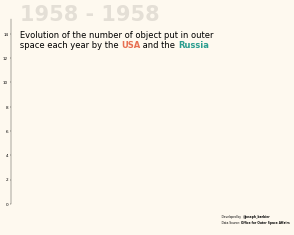

In [7]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# important dates
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
hubble_launch = 1990
internat_space_station = 1998
earth_size_found = 2017
photo_black_hole = 2019
total_objects_today = 2023

# delay for each event
delay_years = 1 # to display the event one year after it happened
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]

# position adjustments for each event
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]

# text to display for each event
event_texts = [
    f'First Human Spaceflight\n<{first_human_spaceflight}>',
    f'US Moon Landing\n<{us_moon_landing}>',
    f'Hubble Launch\n<{hubble_launch}>',
    f'International Space Station\n<{internat_space_station}>',
    f'Earth Size Planets found\n<{earth_size_found}>',
    f'First Image of a Black Hole\n<{photo_black_hole}>'
]

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# functions use to annotate events with black lollipops
def annot_event(current_date, event_start_date, event_end_date, adj, text):

   # condition to only display one event at a time
   if event_start_date <= current_date <= event_end_date:
      
      # filter on the current year
      sub_subset = pivot_df.loc[event_start_date]
      total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']

      # plot lollipop
      ax.plot((event_start_date, event_start_date), (0, total_objects_thisyear), color='black', zorder=10)
      ax.scatter(event_start_date, total_objects_thisyear, color='black', s=100, zorder=10)
      
      # annotate event
      ax_text(
         event_start_date - 2 + adj[0], # x position
         total_objects_thisyear*1.2 + adj[1], # y position
         text,
         fontsize=14,
         color='black',
         ha='left', va='center',
         highlight_textprops=[
               {'fontweight':'bold'}
         ],
         ax=ax
      )

def update(frame):
   ax.clear()
   subset_df = pivot_df.iloc[:frame]
   ax.stackplot(
      subset_df.index,
      subset_df.values.T,
      colors=colors
   )

   # custom axis
   factor_y_axis = 1.9
   y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
   ax.set_ylim(0, y_max)
   ax.set_xticks([])
   ax.spines[['top', 'right', 'bottom']].set_visible(False)

   # year annotation in background
   year = pivot_df.index[frame]
   fig_text(
      0.15, 0.9,
      '1958 - ' + str(round(year)),
      ha='left', va='center',
      fontsize=50,
      fontweight='bold',
      alpha=0.1,
      fig=fig
   )

   # description of video
   text = """
   Evolution of the number of object put in outer
   space each year by the <USA> and the <Russia>
   """
   fig_text(
      0.127, 0.84,
      text,
      ha='left', va='top',
      fontsize=20,
      color='black',
      highlight_textprops=[
               {'color':colors[1],
               'fontweight':'bold'},
               {'color':colors[0],
               'fontweight':'bold'}
      ],
      fig=fig
   )

   # credit annotation
   text = """
   Developed by <@joseph_barbier>
   Data Source: <Office for Outer Space Affairs>
   """
   fig_text(
      0.9, 0,
      text,
      ha='right', va='bottom',
      fontsize=7,
      color='black',
      highlight_textprops=[
         {'fontweight':'bold'},
         {'fontweight':'bold'},
      ],
      fig=fig
   )

   # get text to display at current frame
   total_chars = len(description)
   effective_frame_count = len(pivot_df) - 20 # ends 20 frames before the end
   num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
   current_description = description[:num_chars]
   wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
   
   # display description
   fig_text(
      0.157, 0.72,
      wrapped_text,
      ha='left', va='top',
      fontsize=14,
      color='black',
      fig=fig
   )

   # annotate events
   for event_date, end_date, adj, event_text in zip(dates_highlight, event_end_dates, adjustements, event_texts):
      annot_event(year, event_date, end_date, adj, event_text)

   return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
ani.save('../../static/animations/web-animation-with-text5.gif', writer='imagemagick', fps=5)

![gif](../../static/animations/web-animation-with-text5.gif)


## Custom frame duration

Our current animation has a **constant frame duration**. This means that each frame is displayed for the same amount of time. However, a good animation might need to customize the duration of each frame.

As far as I know, the easiest way to change it is to open the saved GIF, iterate over each frame, and change the duration of each frame. This is done using the `PIL` library.

In our case, we want:

- the last 12 frames to become **slower** in order to give more time to understand the final message.

- the last frame to be displayed for **10 seconds**. so that the viewer has time to read the final message and have the big picture before the GIF restarts.

The code is right after the `save()` function.

We also take the opportunity to add a **last frame** annotation that will be displayed for 10 seconds. In the `update()` function we test if it's the last frame, and if so, we display the final message.


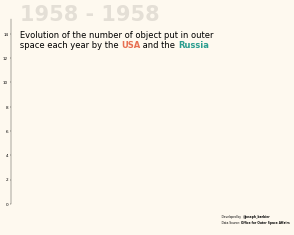

In [8]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# important dates
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
hubble_launch = 1990
internat_space_station = 1998
earth_size_found = 2017
photo_black_hole = 2019
total_objects_today = 2023

# delay for each event
delay_years = 1 # to display the event one year after it happened
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]

# position adjustments for each event
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]

# text to display for each event
event_texts = [
    f'First Human Spaceflight\n<{first_human_spaceflight}>',
    f'US Moon Landing\n<{us_moon_landing}>',
    f'Hubble Launch\n<{hubble_launch}>',
    f'International Space Station\n<{internat_space_station}>',
    f'Earth Size Planets found\n<{earth_size_found}>',
    f'First Image of a Black Hole\n<{photo_black_hole}>'
]

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# functions use to annotate events with black lollipops
def annot_event(current_date, event_start_date, event_end_date, adj, text):

   # condition to only display one event at a time
   if event_start_date <= current_date <= event_end_date:
      
      # filter on the current year
      sub_subset = pivot_df.loc[event_start_date]
      total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']

      # plot lollipop
      ax.plot((event_start_date, event_start_date), (0, total_objects_thisyear), color='black', zorder=10)
      ax.scatter(event_start_date, total_objects_thisyear, color='black', s=100, zorder=10)
      
      # annotate event
      ax_text(
         event_start_date - 2 + adj[0], # x position
         total_objects_thisyear*1.2 + adj[1], # y position
         text,
         fontsize=14,
         color='black',
         ha='left', va='center',
         highlight_textprops=[
               {'fontweight':'bold'}
         ],
         ax=ax
      )

def update(frame):
   ax.clear()
   subset_df = pivot_df.iloc[:frame]
   ax.stackplot(
      subset_df.index,
      subset_df.values.T,
      colors=colors
   )

   # custom axis
   factor_y_axis = 1.9
   y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
   ax.set_ylim(0, y_max)
   ax.set_xticks([])
   ax.spines[['top', 'right', 'bottom']].set_visible(False)

   # year annotation in background
   year = pivot_df.index[frame]
   fig_text(
      0.15, 0.9,
      '1958 - ' + str(round(year)),
      ha='left', va='center',
      fontsize=50,
      fontweight='bold',
      alpha=0.1,
      fig=fig
   )

   # description of video
   text = """
   Evolution of the number of object put in outer
   space each year by the <USA> and the <Russia>
   """
   fig_text(
      0.127, 0.84,
      text,
      ha='left', va='top',
      fontsize=20,
      color='black',
      highlight_textprops=[
               {'color':colors[1],
               'fontweight':'bold'},
               {'color':colors[0],
               'fontweight':'bold'}
      ],
      fig=fig
   )

   # credit annotation
   text = """
   Developed by <@joseph_barbier>
   Data Source: <Office for Outer Space Affairs>
   """
   fig_text(
      0.9, 0,
      text,
      ha='right', va='bottom',
      fontsize=7,
      color='black',
      highlight_textprops=[
         {'fontweight':'bold'},
         {'fontweight':'bold'},
      ],
      fig=fig
   )

   # get text to display at current frame
   total_chars = len(description)
   effective_frame_count = len(pivot_df) - 20 # ends 20 frames before the end
   num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
   current_description = description[:num_chars]
   wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
   
   # display description
   fig_text(
      0.157, 0.72,
      wrapped_text,
      ha='left', va='top',
      fontsize=14,
      color='black',
      fig=fig
   )

   # display conclusion message on last frame
   last_frame = len(pivot_df) - 1
   if frame == last_frame:
      total_last = int(pivot_df.loc[total_objects_today].sum())
      total_usa = int(pivot_df.loc[total_objects_today, "USA"])
      total_rus = int(pivot_df.loc[total_objects_today, "RUS"])
      text = f"""
      Total Objects Launched in Outer Space in {total_objects_today}: <{total_last}>
      <USA>: <{total_usa}> ({total_usa/total_last*100:.2f}%)
      <Russia>: <{total_rus}> ({total_rus/total_last*100:.2f}%)
      """
      fig_text(
         0.43, 0.32,
         text,
         ha='center', va='center',
         fontsize=16,
         color='black',
         highlight_textprops=[
               {'fontweight': 'bold'},
               {'color': colors[1], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
               {'color': colors[0], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
         ],
         fig=fig
      )
   else:

      # annotate events
      for event_date, end_date, adj, event_text in zip(dates_highlight, event_end_dates, adjustements, event_texts):
         annot_event(year, event_date, end_date, adj, event_text)

   return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
path = '../../static/animations/web-animation-with-text6.gif'
ani.save(path, writer='imagemagick', fps=5)

# get initial frames
with Image.open(path) as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
initial_duration = 50 # in ms
for i, frame in enumerate(frames):

   # default duration
   frame_duration = initial_duration
    
   # make last N frames becomes step by step slower
   N = 12
   if i > len(frames) - N:
      frame_duration = initial_duration + (i - len(frames) + N) * 50

   # stay for last date
   if i == len(frames) - 1:
      frame_duration = 10000

   # assign duration to the frame
   frame.info['duration'] = frame_duration

# save the frames
frames[0].save(path, save_all=True, append_images=frames[1:], loop=0)

![gif](../../static/animations/web-animation-with-text6.gif)


## Speed, smoothing and resolution

The animation is now almost perfect. However, it currently lacks smoothing and a good speed. Actually those are **highly related**. The more frames you have, the **smoother the animation will be**, but the slower it will be as well.

The solution to this is to interpolate the dataframe used, which basically means we're going to create a lot of new rows in order to have a **smoother animation**. This is done with the `interpolate()` function from pandas.

The following is a bit verbose because we want different smoothing throughout the animation. We want the years after 2018 to be **very smooth** in order to have a nice transition to the final message.


In [9]:
# interpolate for more data points
multiple = 5
new_index = np.linspace(pivot_df.index.min(), pivot_df.index.max(), len(pivot_df) * multiple-(multiple-1))
pivot_df = pivot_df.reindex(new_index).interpolate(method='linear')
pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'index': 'Year'}, inplace=True)
pivot_df['Year'] = pivot_df['Year'].astype(int)
pivot_df.index = pivot_df['Year']
pivot_df.drop(columns='Year', inplace=True)
pivot_df.index = new_index

# higher interpolate level after 2018
pivot_df_before = pivot_df.loc[:2018]
pivot_df_after = pivot_df.loc[2018:]
multiple_end = 15
new_index_end = np.linspace(pivot_df_after.index.min(), pivot_df_after.index.max(), len(pivot_df_after) * multiple_end-(multiple_end-1))
pivot_df_after = pivot_df_after.reindex(new_index_end).interpolate(method='linear')
pivot_df_after.reset_index(inplace=True)
pivot_df_after.rename(columns={'index': 'Year'}, inplace=True)
pivot_df_after['Year'] = pivot_df_after['Year'].astype(int)
pivot_df_after.index = pivot_df_after['Year']
pivot_df_after.drop(columns='Year', inplace=True)
pivot_df_after.index = new_index_end

# combine data
pivot_df = pd.concat([pivot_df_before, pivot_df_after])
pivot_df.drop_duplicates(inplace=True)
pivot_df.tail()

Code,RUS,USA
2022.946667,61.36,2153.893333
2022.960000,61.52,2156.920000
2022.973333,61.68,2159.946667
2022.986667,61.84,2162.973333
2023.000000,62.00,2166.000000


<br>

Now that we have updated our dataframe, we can run the same code as before to create the animation. The result is a **much smoother** animation.

<br>


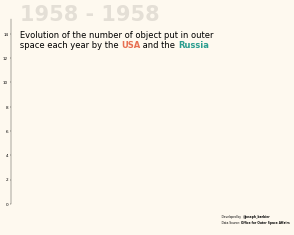

In [10]:
# control resolution (lower is faster)
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# important dates
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
hubble_launch = 1990
internat_space_station = 1998
earth_size_found = 2017
photo_black_hole = 2019
total_objects_today = 2023

# delay for each event
delay_years = 1 # to display the event one year after it happened
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]

# position adjustments for each event
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]

# text to display for each event
event_texts = [
    f'First Human Spaceflight\n<{first_human_spaceflight}>',
    f'US Moon Landing\n<{us_moon_landing}>',
    f'Hubble Launch\n<{hubble_launch}>',
    f'International Space Station\n<{internat_space_station}>',
    f'Earth Size Planets found\n<{earth_size_found}>',
    f'First Image of a Black Hole\n<{photo_black_hole}>'
]

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# functions use to annotate events with black lollipops
def annot_event(current_date, event_start_date, event_end_date, adj, text):

   # condition to only display one event at a time
   if event_start_date <= current_date <= event_end_date:
      
      # filter on the current year
      sub_subset = pivot_df.loc[event_start_date]
      total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']

      # plot lollipop
      ax.plot((event_start_date, event_start_date), (0, total_objects_thisyear), color='black', zorder=10)
      ax.scatter(event_start_date, total_objects_thisyear, color='black', s=100, zorder=10)
      
      # annotate event
      ax_text(
         event_start_date - 2 + adj[0], # x position
         total_objects_thisyear*1.2 + adj[1], # y position
         text,
         fontsize=14,
         color='black',
         ha='left', va='center',
         highlight_textprops=[
               {'fontweight':'bold'}
         ],
         ax=ax
      )

def update(frame):
   ax.clear()
   subset_df = pivot_df.iloc[:frame]
   ax.stackplot(
      subset_df.index,
      subset_df.values.T,
      colors=colors
   )

   # custom axis
   factor_y_axis = 1.9
   y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
   ax.set_ylim(0, y_max)
   ax.set_xticks([])
   ax.spines[['top', 'right', 'bottom']].set_visible(False)

   # year annotation in background
   year = pivot_df.index[frame]
   fig_text(
      0.15, 0.9,
      '1958 - ' + str(round(year)),
      ha='left', va='center',
      fontsize=50,
      fontweight='bold',
      alpha=0.1,
      fig=fig
   )

   # description of video
   text = """
   Evolution of the number of object put in outer
   space each year by the <USA> and the <Russia>
   """
   fig_text(
      0.127, 0.84,
      text,
      ha='left', va='top',
      fontsize=20,
      color='black',
      highlight_textprops=[
               {'color':colors[1],
               'fontweight':'bold'},
               {'color':colors[0],
               'fontweight':'bold'}
      ],
      fig=fig
   )

   # credit annotation
   text = """
   Developed by <@joseph_barbier>
   Data Source: <Office for Outer Space Affairs>
   """
   fig_text(
      0.9, 0,
      text,
      ha='right', va='bottom',
      fontsize=7,
      color='black',
      highlight_textprops=[
         {'fontweight':'bold'},
         {'fontweight':'bold'},
      ],
      fig=fig
   )

   # get text to display at current frame
   total_chars = len(description)
   effective_frame_count = len(pivot_df) - 20 # ends 20 frames before the end
   num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
   current_description = description[:num_chars]
   wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
   
   # display description
   fig_text(
      0.157, 0.72,
      wrapped_text,
      ha='left', va='top',
      fontsize=14,
      color='black',
      fig=fig
   )

   # display conclusion message on last frame
   last_frame = len(pivot_df) - 1
   if frame == last_frame:
      total_last = int(pivot_df.loc[total_objects_today].sum())
      total_usa = int(pivot_df.loc[total_objects_today, "USA"])
      total_rus = int(pivot_df.loc[total_objects_today, "RUS"])
      text = f"""
      Total Objects Launched in Outer Space in {total_objects_today}: <{total_last}>
      <USA>: <{total_usa}> ({total_usa/total_last*100:.2f}%)
      <Russia>: <{total_rus}> ({total_rus/total_last*100:.2f}%)
      """
      fig_text(
         0.43, 0.32,
         text,
         ha='center', va='center',
         fontsize=16,
         color='black',
         highlight_textprops=[
               {'fontweight': 'bold'},
               {'color': colors[1], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
               {'color': colors[0], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
         ],
         fig=fig
      )
   else:

      # annotate events
      for event_date, end_date, adj, event_text in zip(dates_highlight, event_end_dates, adjustements, event_texts):
         annot_event(year, event_date, end_date, adj, event_text)

   return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
path = '../../static/animations/web-animation-with-text7.gif'
ani.save(path, writer='imagemagick', fps=5)

# get initial frames
with Image.open(path) as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
initial_duration = 50 # in ms
for i, frame in enumerate(frames):

   # default duration
   frame_duration = initial_duration
    
   # make last N frames becomes step by step slower
   N = 12
   if i > len(frames) - N:
      frame_duration = initial_duration + (i - len(frames) + N) * 50

   # stay for last date
   if i == len(frames) - 1:
      frame_duration = 10000

   # assign duration to the frame
   frame.info['duration'] = frame_duration

# save the frames
frames[0].save(path, save_all=True, append_images=frames[1:], loop=0)

![gif](../../static/animations/web-animation-with-text7.gif)


## Resolution

Now that we have built the chart with the result we want, we can **increase the resolution** for the final GIF. This is done by changing the `dpi` parameter at the beginning of the script.

This can takes a **few minutes** to run (between ~5 to ~10 minutes for this case).


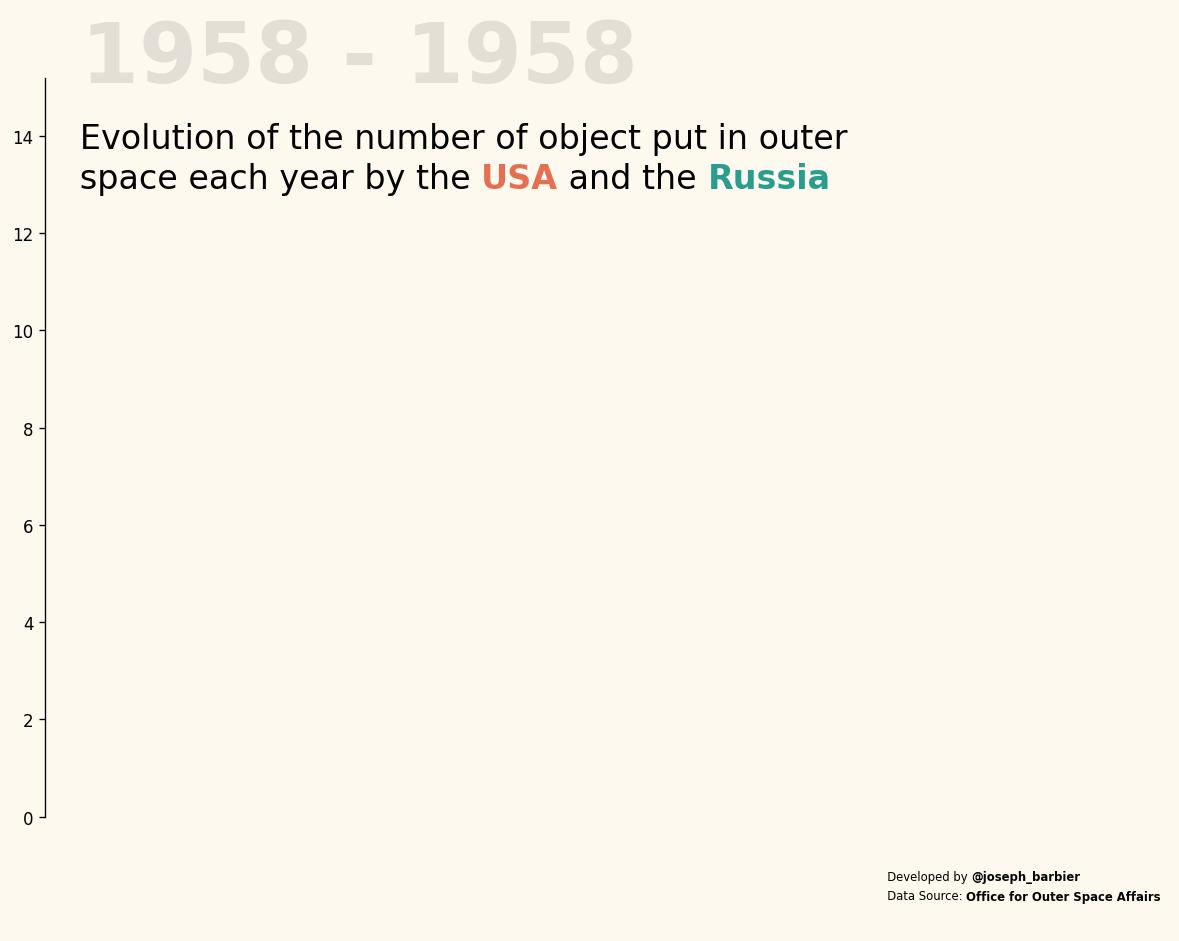

In [11]:
# control resolution (lower is faster)
dpi = 120
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# important dates
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
hubble_launch = 1990
internat_space_station = 1998
earth_size_found = 2017
photo_black_hole = 2019
total_objects_today = 2023

# delay for each event
delay_years = 1 # to display the event one year after it happened
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]

# position adjustments for each event
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]

# text to display for each event
event_texts = [
    f'First Human Spaceflight\n<{first_human_spaceflight}>',
    f'US Moon Landing\n<{us_moon_landing}>',
    f'Hubble Launch\n<{hubble_launch}>',
    f'International Space Station\n<{internat_space_station}>',
    f'Earth Size Planets found\n<{earth_size_found}>',
    f'First Image of a Black Hole\n<{photo_black_hole}>'
]

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

# create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# functions use to annotate events with black lollipops
def annot_event(current_date, event_start_date, event_end_date, adj, text):

   # condition to only display one event at a time
   if event_start_date <= current_date <= event_end_date:
      
      # filter on the current year
      sub_subset = pivot_df.loc[event_start_date]
      total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']

      # plot lollipop
      ax.plot((event_start_date, event_start_date), (0, total_objects_thisyear), color='black', zorder=10)
      ax.scatter(event_start_date, total_objects_thisyear, color='black', s=100, zorder=10)
      
      # annotate event
      ax_text(
         event_start_date - 2 + adj[0], # x position
         total_objects_thisyear*1.2 + adj[1], # y position
         text,
         fontsize=14,
         color='black',
         ha='left', va='center',
         highlight_textprops=[
               {'fontweight':'bold'}
         ],
         ax=ax
      )

def update(frame):
   ax.clear()
   subset_df = pivot_df.iloc[:frame]
   ax.stackplot(
      subset_df.index,
      subset_df.values.T,
      colors=colors
   )

   # custom axis
   factor_y_axis = 1.9
   y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
   ax.set_ylim(0, y_max)
   ax.set_xticks([])
   ax.spines[['top', 'right', 'bottom']].set_visible(False)

   # year annotation in background
   year = pivot_df.index[frame]
   fig_text(
      0.15, 0.9,
      '1958 - ' + str(round(year)),
      ha='left', va='center',
      fontsize=50,
      fontweight='bold',
      alpha=0.1,
      fig=fig
   )

   # description of video
   text = """
   Evolution of the number of object put in outer
   space each year by the <USA> and the <Russia>
   """
   fig_text(
      0.127, 0.84,
      text,
      ha='left', va='top',
      fontsize=20,
      color='black',
      highlight_textprops=[
               {'color':colors[1],
               'fontweight':'bold'},
               {'color':colors[0],
               'fontweight':'bold'}
      ],
      fig=fig
   )

   # credit annotation
   text = """
   Developed by <@joseph_barbier>
   Data Source: <Office for Outer Space Affairs>
   """
   fig_text(
      0.9, 0,
      text,
      ha='right', va='bottom',
      fontsize=7,
      color='black',
      highlight_textprops=[
         {'fontweight':'bold'},
         {'fontweight':'bold'},
      ],
      fig=fig
   )

   # get text to display at current frame
   total_chars = len(description)
   effective_frame_count = len(pivot_df) - 20 # ends 20 frames before the end
   num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
   current_description = description[:num_chars]
   wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
   
   # display description
   fig_text(
      0.157, 0.72,
      wrapped_text,
      ha='left', va='top',
      fontsize=14,
      color='black',
      fig=fig
   )

   # display conclusion message on last frame
   last_frame = len(pivot_df) - 1
   if frame == last_frame:
      total_last = int(pivot_df.loc[total_objects_today].sum())
      total_usa = int(pivot_df.loc[total_objects_today, "USA"])
      total_rus = int(pivot_df.loc[total_objects_today, "RUS"])
      text = f"""
      Total Objects Launched in Outer Space in {total_objects_today}: <{total_last}>
      <USA>: <{total_usa}> ({total_usa/total_last*100:.2f}%)
      <Russia>: <{total_rus}> ({total_rus/total_last*100:.2f}%)
      """
      fig_text(
         0.43, 0.32,
         text,
         ha='center', va='center',
         fontsize=16,
         color='black',
         highlight_textprops=[
               {'fontweight': 'bold'},
               {'color': colors[1], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
               {'color': colors[0], 'fontweight': 'bold'},
               {'fontweight': 'bold'},
         ],
         fig=fig
      )
   else:

      # annotate events
      for event_date, end_date, adj, event_text in zip(dates_highlight, event_end_dates, adjustements, event_texts):
         annot_event(year, event_date, end_date, adj, event_text)

   return ax

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=10 # in ms
)
path = '../../static/animations/web-animation-with-text8.gif'
ani.save(path, writer='imagemagick', fps=5)

# get initial frames
with Image.open(path) as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
initial_duration = 50 # in ms
for i, frame in enumerate(frames):

   # default duration
   frame_duration = initial_duration
    
   # make last N frames becomes step by step slower
   N = 12
   if i > len(frames) - N:
      frame_duration = initial_duration + (i - len(frames) + N) * 50

   # stay for last date
   if i == len(frames) - 1:
      frame_duration = 10000

   # assign duration to the frame
   frame.info['duration'] = frame_duration

# save the frames
frames[0].save(path, save_all=True, append_images=frames[1:], loop=0)

![gif](../../static/animations/web-animation-with-text8.gif)


## Going further

This article explains how to reproduce **an animation** that displays the number of outer space objects launched by the US and Russia over the years. The animation is enriched with **annotations** that highlight important events and a text that appears throughout the animation.

You might be interested in

- the [stacked area section](/stacked-area-plot)
- the [animation section](/animation)
